In [1]:
# Setup
import sys
import os
import pandas as pd
sys.path.append(os.path.join(os.getcwd(), "src"))

from code_location_interview.assets.magenta_interview.get_data import (
    core_data as core_data_asset,
    usage_info as usage_info_asset,
    customer_interactions as customer_interactions_asset,
)

# Load data
rating_account_id, unique_customer_ids, core_data = core_data_asset()
usage_info = usage_info_asset(rating_account_id)
customer_interactions = customer_interactions_asset(unique_customer_ids)

INFO:dagster.builtin:Using deployment of: dev


18:30:58  The selection criterion 'fqn:*' does not match any enabled nodes


/workspaces/data-scientist-at-magenta-/src/code_location_interview/code_location_interview/__init__.py:19: ExperimentalWarning: Function `with_source_code_references` is experimental. It may break in future versions, even between dot releases. To mute warnings for experimental functionality, invoke warnings.filterwarnings("ignore", category=dagster.ExperimentalWarning) or use one of the other methods described at https://docs.python.org/3/library/warnings.html#describing-warning-filters.
  all_assets = with_source_code_references(
/workspaces/data-scientist-at-magenta-/.pixi/envs/ci-validation/lib/python3.12/site-packages/dagster/_core/definitions/metadata/source_code.py:74: ExperimentalWarning: Class `LocalFileCodeReference` is experimental. It may break in future versions, even between dot releases. To mute warnings for experimental functionality, invoke warnings.filterwarnings("ignore", category=dagster.ExperimentalWarning) or use one of the other methods described at https://docs.p

In [19]:
# Load data
rating_account_id, unique_customer_ids, core_data = core_data_asset()
usage_info = usage_info_asset(rating_account_id)
customer_interactions = customer_interactions_asset(unique_customer_ids)

INFO:dagster.builtin.code_location_interview.assets.magenta_interview.get_data:Age
INFO:dagster.builtin.code_location_interview.assets.magenta_interview.get_data:contract_lifetime_days
INFO:dagster.builtin.code_location_interview.assets.magenta_interview.get_data:remaining_binding_days
INFO:dagster.builtin.code_location_interview.assets.magenta_interview.get_data:has_special_offer
INFO:dagster.builtin.code_location_interview.assets.magenta_interview.get_data:available_gb
INFO:dagster.builtin.code_location_interview.assets.magenta_interview.get_data:gross_mrc
INFO:dagster.builtin.code_location_interview.assets.magenta_interview.get_data:smartphone_brand
INFO:dagster.builtin.code_location_interview.assets.magenta_interview.get_data:0.43359
INFO:dagster.builtin.code_location_interview.assets.magenta_interview.get_data:Create df


In [28]:
core_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   rating_account_id       100000 non-null  int64  
 1   customer_id             100000 non-null  object 
 2   age                     100000 non-null  int64  
 3   contract_lifetime_days  100000 non-null  int64  
 4   remaining_binding_days  100000 non-null  int64  
 5   has_special_offer       100000 non-null  int64  
 6   is_magenta1_customer    100000 non-null  int64  
 7   available_gb            85849 non-null   object 
 8   gross_mrc               100000 non-null  float64
 9   smartphone_brand        100000 non-null  object 
 10  has_done_upselling      100000 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 8.4+ MB


# EDA

In [14]:
#core_data.shape
core_data.dtypes
#core_data.head()

rating_account_id           int64
customer_id                object
age                         int64
contract_lifetime_days      int64
remaining_binding_days      int64
has_special_offer           int64
is_magenta1_customer        int64
available_gb               object
gross_mrc                 float64
smartphone_brand           object
has_done_upselling          int64
dtype: object

In [23]:
core_data.head(5)

,rating_account_id,customer_id,age,contract_lifetime_days,remaining_binding_days,has_special_offer,is_magenta1_customer,available_gb,gross_mrc,smartphone_brand,has_done_upselling
0,314589,2.225399,42,205,-156,0,1,None,60.71,iPhone,0
1,138154,5.823951,44,135,105,0,1,50,6.33,Samsung,0
2,150549,3.369681,49,842,-468,0,0,30,50.10,Huawei,0
3,592610,2.876118,36,529,364,0,1,30,67.35,iPhone,0
4,869757,1.869929,43,971,380,0,0,None,16.94,iPhone,0


In [21]:
core_data['customer_id'] = core_data['customer_id'].astype(str)



In [24]:
print("Total rows:", core_data.shape[0])
print("Unique customer IDs:", core_data['customer_id'].nunique())
print(core_data['customer_id'].value_counts().head())

Total rows: 100000
Unique customer IDs: 58438
customer_id
2.777666    9
1.542986    8
3.787313    8
5.562001    7
4.973756    7
Name: count, dtype: int64


### duplicates

In [25]:
core_data.duplicated().sum()

np.int64(0)

### conflicting targets 

In [27]:
core_data.groupby('rating_account_id')['has_done_upselling'].nunique().value_counts()

has_done_upselling
1    100000
Name: count, dtype: int64

### granularity is at rating account id level.

In [29]:
core_data.groupby('customer_id')['has_done_upselling'].nunique().value_counts()

has_done_upselling
1    54014
2     4424
Name: count, dtype: int64

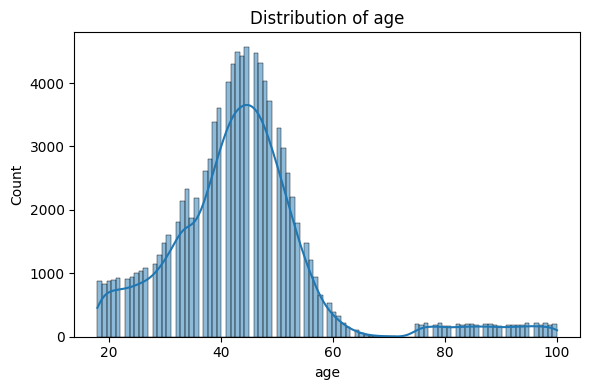

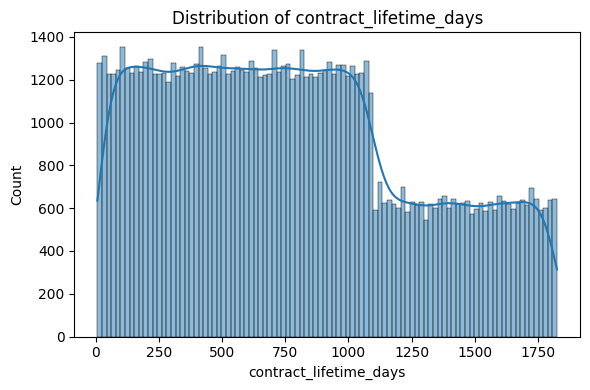

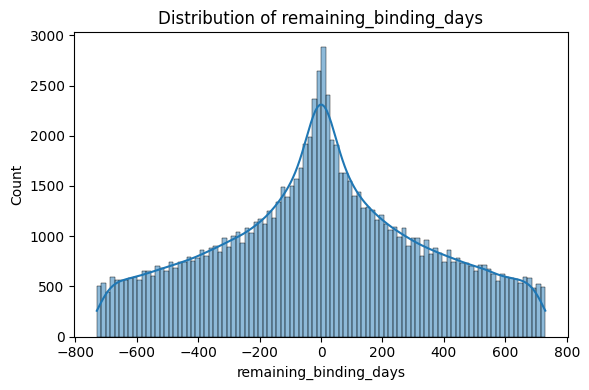

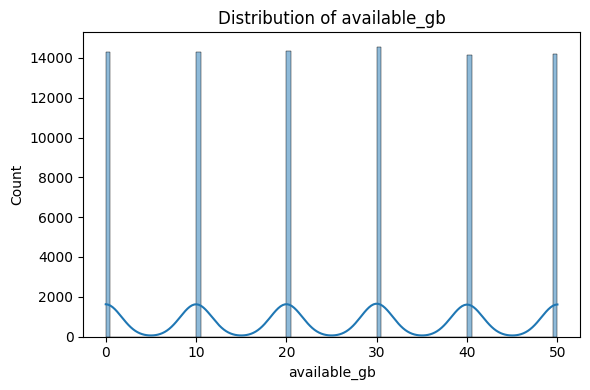

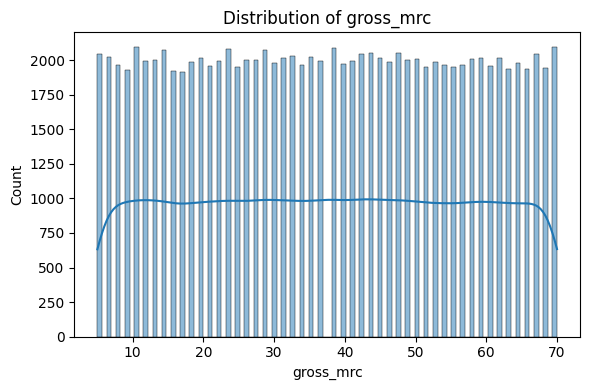

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['age', 'contract_lifetime_days', 'remaining_binding_days', 'available_gb', 'gross_mrc']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(core_data[col], bins=100, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

age
Right-skewed distribution, concentrated between 35–55. Peak near 45. Reflects typical mobile customer base. Potentially predictive.

remaining_binding_days
Centered around 0 with symmetric spread. High density near contract end. May indicate prime timing for upsell interventions.

gross_mrc
Uniform distribution across full pricing range. Likely anonymized or simulated. Still useful to capture payment capacity or product tier.

available_gb
Discrete values in fixed increments (0–50 GB). Represents data plan tiers. Treat as categorical. Potentially strong upsell driver.

contract_lifetime_days
Bimodal distribution. Drop at ~1000 days suggests renewal cycles. Longer durations may reflect loyalty or past upsell activity.

In [40]:
core_data['available_gb'] = core_data['available_gb'].astype('category')


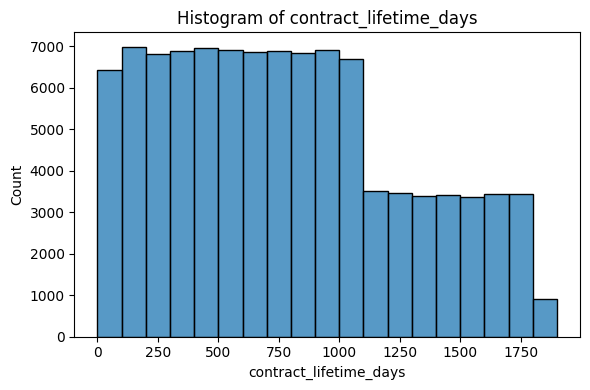

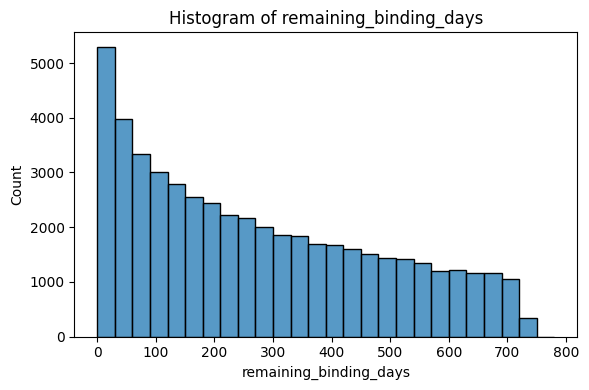

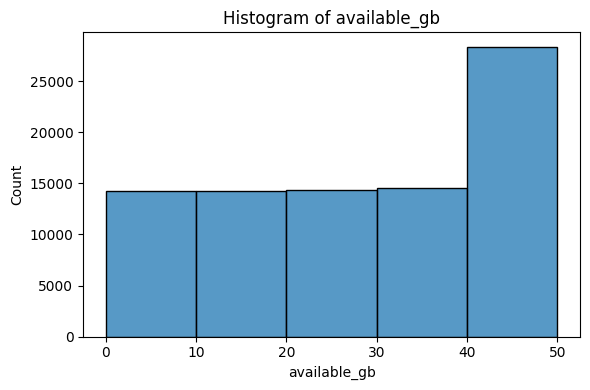

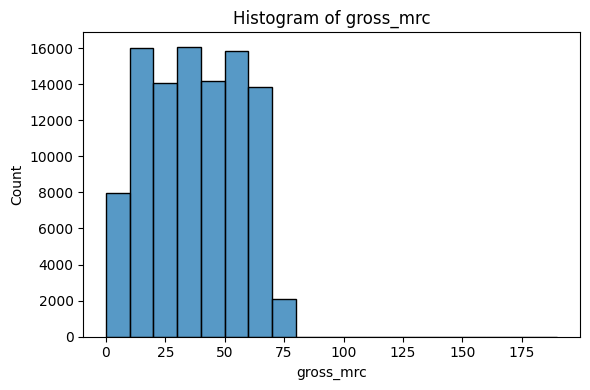

In [36]:
custom_bins = {
    'contract_lifetime_days': range(0, 2000, 100),
    'remaining_binding_days': range(0, 800, 30),
    'available_gb': range(0, 60, 10),
    'gross_mrc': range(0, 200, 10)
}

for col in custom_bins:
    plt.figure(figsize=(6, 4))
    sns.histplot(core_data[col], bins=custom_bins[col], kde=False)
    plt.title(f"Histogram of {col}")
    plt.tight_layout()
    plt.show()


In [32]:
# Quick shape and info
core_data.info()
core_data.head()


###
###customer_interactions.info()
###customer_interactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   rating_account_id       100000 non-null  int64  
 1   customer_id             100000 non-null  object 
 2   age                     100000 non-null  int64  
 3   contract_lifetime_days  100000 non-null  int64  
 4   remaining_binding_days  100000 non-null  int64  
 5   has_special_offer       100000 non-null  int64  
 6   is_magenta1_customer    100000 non-null  int64  
 7   available_gb            85849 non-null   object 
 8   gross_mrc               100000 non-null  float64
 9   smartphone_brand        100000 non-null  object 
 10  has_done_upselling      100000 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 8.4+ MB


,rating_account_id,customer_id,age,contract_lifetime_days,remaining_binding_days,has_special_offer,is_magenta1_customer,available_gb,gross_mrc,smartphone_brand,has_done_upselling
0,314589,2.225399,42,205,-156,0,1,None,60.71,iPhone,0
1,138154,5.823951,44,135,105,0,1,50,6.33,Samsung,0
2,150549,3.369681,49,842,-468,0,0,30,50.10,Huawei,0
3,592610,2.876118,36,529,364,0,1,30,67.35,iPhone,0
4,869757,1.869929,43,971,380,0,0,None,16.94,iPhone,0


In [2]:
usage_info.info()
usage_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   rating_account_id      400000 non-null  int64  
 1   billed_period_month_d  400000 non-null  object 
 2   has_used_roaming       400000 non-null  int64  
 3   used_gb                400000 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 12.2+ MB


,rating_account_id,billed_period_month_d,has_used_roaming,used_gb
0,449607,2024-04-01,1,0.4
1,449607,2024-05-01,0,0.9
2,449607,2024-06-01,0,0.9
3,449607,2024-07-01,0,0.5
4,655895,2024-04-01,1,0.6


In [3]:
usage_info.head()

,rating_account_id,billed_period_month_d,has_used_roaming,used_gb
0,984579,2024-04-01,1,0.4
1,984579,2024-05-01,0,0.7
2,984579,2024-06-01,0,0.4
3,984579,2024-07-01,0,0.6
4,812562,2024-04-01,1,0.3
